In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
%run ../modules/utils.ipynb
%run ../modules/cds.ipynb
%run ../modules/preprocessing.ipynb

In [194]:
df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/m5cRatio/190328_s15.xls')
df.shape

(5028, 34)

In [195]:
df.shape, df.Mass.unique().shape

((5028, 34), (5011,))

In [196]:
df = df.sort_values('Vol', ascending=False)
df.drop_duplicates(subset=['Mass'], keep='first', inplace=True)

In [197]:
features = ['Mass', 'RT', 'Vol']
TAG = 826.3184

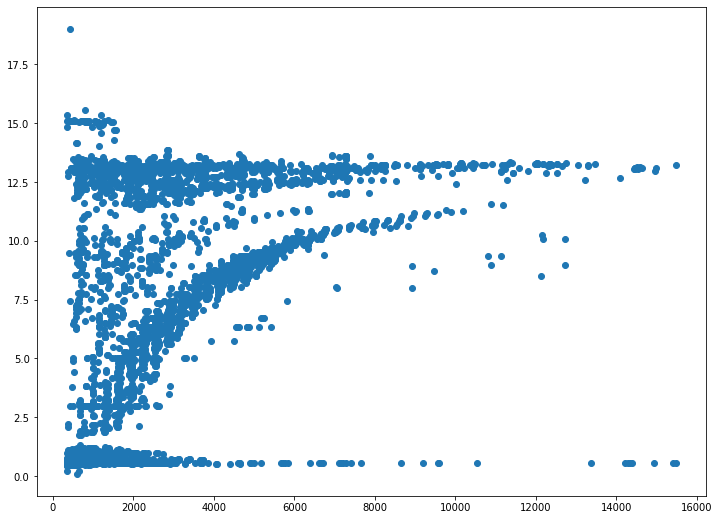

In [198]:
plot_zone(df)

In [199]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Show/Hide', 'Cpd', 'File', 'ID_Source', 'Name', 'Formula', 'Saturated',
       'm/z', 'Mass', 'RT', 'Vol', 'Quality_Score', 'Score', 'Score_(Lib)',
       'Score_(DB)', 'Score_(MFG)', 'RT_Diff_(Tgt)', 'Diff_(Tgt,_ppm)',
       'Diff_(DB,_ppm)', 'Diff_(MFG,_ppm)', 'Polarity', 'Ions', 'Height',
       'Area', 'Hits_(DB)', 'Algorithm', 'Library', 'Uncertainty',
       'Significance', 'FIs_Conf.', 'FIs_Conf._%', 'FIs_Eval.', 'Source',
       'Flag_Severity_(Tgt)'],
      dtype='object')

In [200]:
df = df[df.Quality_Score>=50]

In [201]:
df.to_excel('/Users/bryan/Documents/SeqDataSets/m5cRatio/190328_s15_qs.xls')

In [166]:
df_vol_top = df[df.Mass > 6000].sort_values('Vol', ascending=False).iloc[:10]
df_vol_top[features]

,Mass,RT,Vol
4548,7220.1796,13.041,172110928
4553,7234.1905,13.121,55858036
4342,6312.9818,12.435,18110986
4262,6007.9386,12.423,15402146
4351,6331.8974,9.980,14668313
4302,6066.8136,10.043,8898815
4566,7248.1690,13.560,6617298
4567,7249.1641,13.150,6558914
4556,7236.1706,11.988,6411062
4524,7085.1188,13.042,5820264


In [167]:
df_3p_endpoints, df_5p_endpoints = endpoints(df, tag=TAG)

Input shape (3318, 34) filtered shape (10, 34) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 1 5' ladder ends 1


In [168]:
df_3p_endpoints[features], df_5p_endpoints[features]

(           Mass      RT        Vol
 4548  7220.1796  13.041  172110928,
            Mass    RT       Vol
 4351  6331.8974  9.98  14668313)

df3 555 df5 555
6331.8718
end5p_idxs Int64Index([4351, 4349, 4350], dtype='int64')
df5p_endpoints Mass      6331.9
RT          9.98
Vol     14668313
Name: 4351, dtype: object


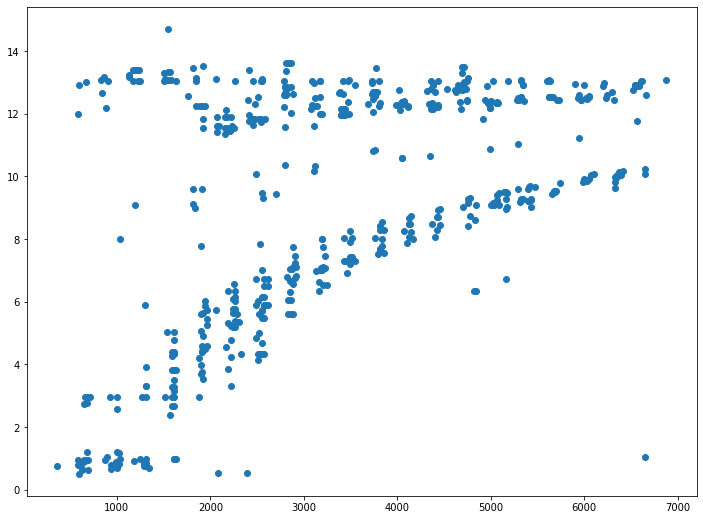

In [174]:
df_ms, _ = computational_data_seperation(df, df, 7220.1796, tag=TAG)
plot_zone(df_ms)

In [175]:
df_top = df_ms.sort_values('Vol', ascending=False).iloc[:60]
bcr_ret = base_calling_random(df_top)
bcr_ret[0].shape

mass_x (60,) mass_y (60,)
df3_idxs 14 df5_idxs 15
df3_idxs 10 df5_idxs 10
df3_idxs 6 df5_idxs 6
df3_idxs 11 df5_idxs 10
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0
df3_idxs 3 df5_idxs 3
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0


(51, 34)

           Mass      RT        Vol
4548  7220.1796  13.041  172110928
4351  6331.8974   9.980   14668313


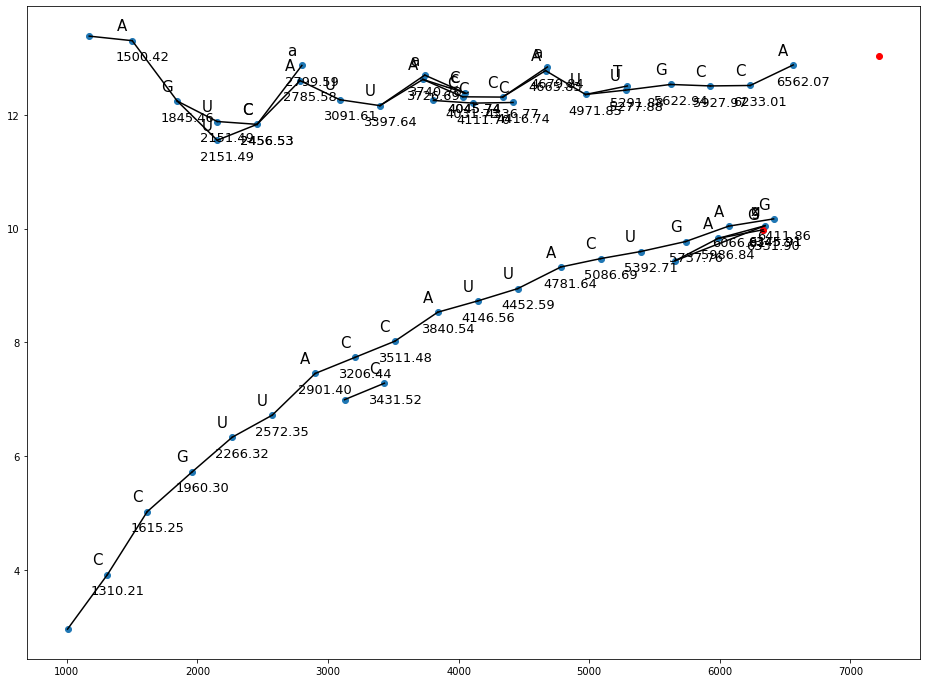

In [176]:
plot_basecalling(*bcr_ret, endpoints=pd.concat([df_3p_endpoints, df_5p_endpoints]))

In [151]:
df_label, df_unlabel = label_unlabel_comparison(df, df, tag=TAG)

df3_idxs 671 df5_idxs 689


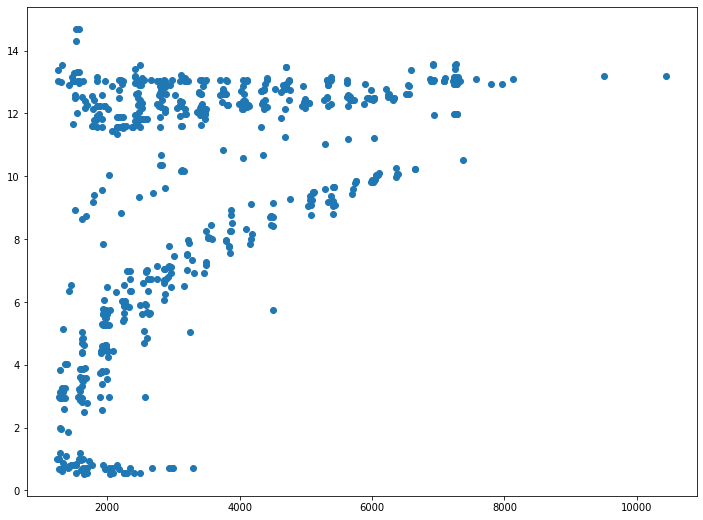

In [152]:
plot_zone(df_label)

mass_x (60,) mass_y (60,)
df3_idxs 7 df5_idxs 9
df3_idxs 5 df5_idxs 5
df3_idxs 4 df5_idxs 3
df3_idxs 7 df5_idxs 7
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
(35, 34)
           Mass      RT        Vol
4662  7220.1785  13.030  213749120
4442  6331.8978   9.979   17640550


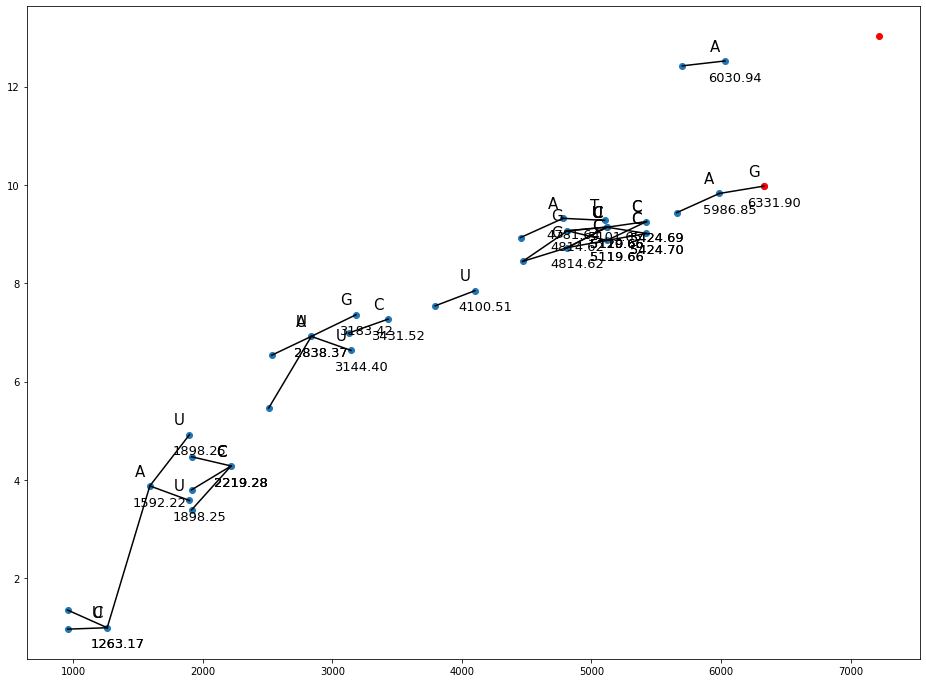

In [158]:
df_label_top = df_unlabel.sort_values('Vol', ascending=False).iloc[:60]
lbl_bcr_ret = base_calling_random(df_label_top)
print(lbl_bcr_ret[0].shape)
plot_basecalling(*lbl_bcr_ret, endpoints=pd.concat([df_3p_endpoints, df_5p_endpoints]))